In [ ]:
#dataset: https://data.gov.sg/dataset/resale-flat-prices (hdb resale)
#dataset: https://data.gov.sg/dataset/private-residential-property-price-index-by-type-of-property?view_id=a2f1ffe8-e7b1-4fbb-8c41-c6a26e0456d4&resource_id=947b5cbe-0b0a-4fdb-b06e-aca1e34d87fd (private property)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
plt.rcParams['figure.figsize']=[10,8]

In [3]:
#load and read csv file for 1990 - 1999 period

df=pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df1=pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df4=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df2=pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
#change month to year 'yyyy' and convert to integer
file_list = [df,df1,df2,df3,df4]
for j in file_list:
    j['month']= [d[:-3] for d in j['month']]
    j['month']=[int(h) for h in j['month']]
    
for k in file_list:
    k['lease_commence_date']=[int(g) for g in k['lease_commence_date']]


In [5]:
# drop block, street_name, storey_range and flat_model from all dataframes

col =['block','street_name','flat_model','storey_range']
file_list = [df,df1,df2,df3,df4]
for w in file_list:
    for i in col:
        w.drop(i,axis='columns',inplace=True)


In [21]:
# drop remaining_lease from df3 & df4 dataframes

col =['remaining_lease']
file_list = [df3,df4]
for w in file_list:
    for i in col:
        w.drop(i,axis='columns',inplace=True)

In [7]:
# rename 'month to 'year
file_list = [df,df1,df2,df3,df4]
for q in file_list:
    q.rename(columns={'month':'year'},inplace=True) 


In [8]:
# create a new column "remaining_lease" and calculate the value

file_list = [df,df1,df2,df3,df4]
for n in file_list:
    n['remaining_lease']=99-(2022-n['lease_commence_date'])

In [9]:
#concatenate into 1 dataframe

file_list = [df,df1,df2,df3,df4]
df5=pd.concat(file_list)

In [10]:
df5['flat_type'].value_counts()

4 ROOM              317602
3 ROOM              276771
5 ROOM              175682
EXECUTIVE            64240
2 ROOM               10126
1 ROOM                1284
MULTI GENERATION       279
MULTI-GENERATION       237
Name: flat_type, dtype: int64

In [11]:
#replace flat_type value of 'MULTI-GENERATION' to 7. 

df5['flat_type'].replace('MULTI-GENERATION','MULTI_GENERATION',inplace=True)
df5['flat_type'].replace('MULTI GENERATION','MULTI_GENERATION',inplace=True)

In [12]:
#create a new column "price_per_sqm"

df5['price_per_sqm']=round(df5['resale_price']/df5['floor_area_sqm'],0)
df5.head()

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,price_per_sqm
0,1990,ANG MO KIO,1 ROOM,31.0,1977,9000.0,54,290.0
1,1990,ANG MO KIO,1 ROOM,31.0,1977,6000.0,54,194.0
2,1990,ANG MO KIO,1 ROOM,31.0,1977,8000.0,54,258.0
3,1990,ANG MO KIO,1 ROOM,31.0,1977,6000.0,54,194.0
4,1990,ANG MO KIO,3 ROOM,73.0,1976,47200.0,53,647.0


In [13]:
#create a new column 'price_sqm_per_remaining_yr'

df5['price_sqm_per_remaining_yr']=round(df5['price_per_sqm']/df5['remaining_lease'],0)

In [14]:
#reorder columns

df5=df5[['year','town','flat_type','floor_area_sqm','resale_price','price_per_sqm','price_sqm_per_remaining_yr',\
         'lease_commence_date','remaining_lease']]

In [15]:
#create dataframes of all flat types

df_px_1ROOM= df5.loc[df5['flat_type']=='1 ROOM',['year','resale_price']]
df_px_1ROOM_t = round(df_px_1ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_1ROOM_t.reset_index(inplace=True)

df_px_2ROOM= df5.loc[df5['flat_type']=='2 ROOM',['year','resale_price']]
df_px_2ROOM_t = round(df_px_2ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_2ROOM_t.reset_index(inplace=True)

df_px_3ROOM= df5.loc[df5['flat_type']=='3 ROOM',['year','resale_price']]
df_px_3ROOM_t = round(df_px_3ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_3ROOM_t.reset_index(inplace=True)

df_px_4ROOM= df5.loc[df5['flat_type']=='4 ROOM',['year','resale_price']]
df_px_4ROOM_t = round(df_px_4ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_4ROOM_t.reset_index(inplace=True)

df_px_5ROOM= df5.loc[df5['flat_type']=='5 ROOM',['year','resale_price']]
df_px_5ROOM_t = round(df_px_5ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_5ROOM_t.reset_index(inplace=True)

df_px_EXECUTIVE= df5.loc[df5['flat_type']=='EXECUTIVE',['year','resale_price']]
df_px_EXECUTIVE_t = round(df_px_EXECUTIVE.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_EXECUTIVE_t.reset_index(inplace=True)

df_px_MULTI_GENERATION= df5.loc[df5['flat_type']=='MULTI_GENERATION',['year','resale_price']]
df_px_MULTI_GENERATION_t = round(df_px_MULTI_GENERATION.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_MULTI_GENERATION_t.reset_index(inplace=True)

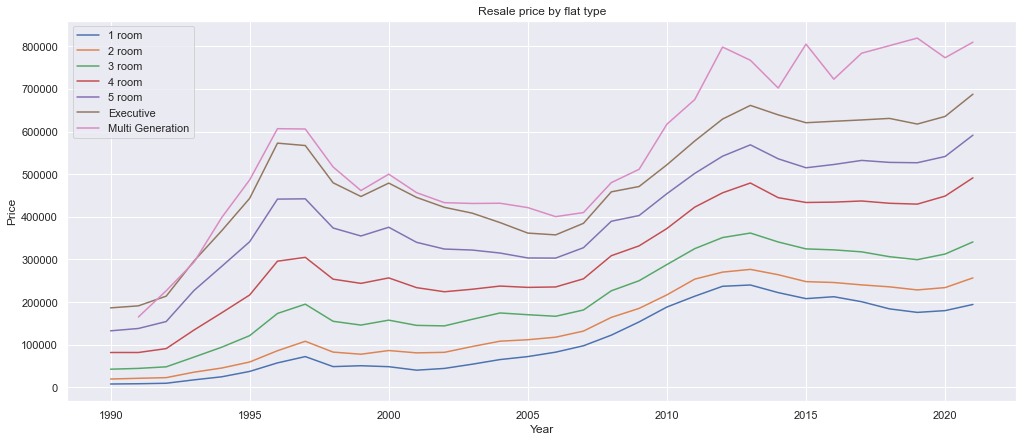

In [16]:
#plot the line charts to track resale price of all the flat types

fig = plt.gcf()
fig.set_size_inches(17,7)

line_list = [df_px_1ROOM_t,df_px_2ROOM_t,df_px_3ROOM_t,df_px_4ROOM_t,df_px_5ROOM_t,df_px_EXECUTIVE_t,\
             df_px_MULTI_GENERATION_t]
for d in line_list:
    plt.plot(d['year'], d['resale_price']);
plt.legend(['1 room','2 room','3 room','4 room','5 room','Executive','Multi Generation']);
plt.xlabel('Year');
plt.ylabel('Price');
plt.title('Resale price by flat type');

In [17]:
#create dataframes of all towns

df_px_1ROOM= df5.loc[df5['flat_type']=='1 ROOM',['year','resale_price']]
df_px_1ROOM_t = round(df_px_1ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_1ROOM_t.reset_index(inplace=True)

df_px_2ROOM= df5.loc[df5['flat_type']=='2 ROOM',['year','resale_price']]
df_px_2ROOM_t = round(df_px_2ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_2ROOM_t.reset_index(inplace=True)

df_px_3ROOM= df5.loc[df5['flat_type']=='3 ROOM',['year','resale_price']]
df_px_3ROOM_t = round(df_px_3ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_3ROOM_t.reset_index(inplace=True)

df_px_4ROOM= df5.loc[df5['flat_type']=='4 ROOM',['year','resale_price']]
df_px_4ROOM_t = round(df_px_4ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_4ROOM_t.reset_index(inplace=True)

df_px_5ROOM= df5.loc[df5['flat_type']=='5 ROOM',['year','resale_price']]
df_px_5ROOM_t = round(df_px_5ROOM.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_5ROOM_t.reset_index(inplace=True)

df_px_EXECUTIVE= df5.loc[df5['flat_type']=='EXECUTIVE',['year','resale_price']]
df_px_EXECUTIVE_t = round(df_px_EXECUTIVE.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_EXECUTIVE_t.reset_index(inplace=True)

df_px_MULTI_GENERATION= df5.loc[df5['flat_type']=='MULTI_GENERATION',['year','resale_price']]
df_px_MULTI_GENERATION_t = round(df_px_MULTI_GENERATION.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_px_MULTI_GENERATION_t.reset_index(inplace=True)

In [18]:
#create dataframes of all towns

df_ANG_MO_KIO = df5.loc[df5['town']=='ANG MO KIO',['year','resale_price']]
df_ANG_MO_KIO = round(df_ANG_MO_KIO.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_ANG_MO_KIO.reset_index(inplace=True)

df_BEDOK= df5.loc[df5['town']=='BEDOK',['year','resale_price']]
df_BEDOK = round(df_BEDOK.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_BEDOK.reset_index(inplace=True)

df_BISHAN= df5.loc[df5['town']=='BISHAN',['year','resale_price']]
df_BISHAN = round(df_BISHAN.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_BISHAN.reset_index(inplace=True)

df_BUKIT_BATOK= df5.loc[df5['town']=='BUKIT BATOK',['year','resale_price']]
df_BUKIT_BATOK = round(df_BUKIT_BATOK.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_BUKIT_BATOK.reset_index(inplace=True)

df_BUKIT_MERAH= df5.loc[df5['town']=='BUKIT MERAH',['year','resale_price']]
df_BUKIT_MERAH = round(df_BUKIT_MERAH.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_BUKIT_MERAH.reset_index(inplace=True)

df_BUKIT_TIMAH= df5.loc[df5['town']=='BUKIT TIMAH',['year','resale_price']]
df_BUKIT_TIMAH = round(df_BUKIT_TIMAH.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_BUKIT_TIMAH.reset_index(inplace=True)

df_CENTRAL_AREA= df5.loc[df5['town']=='CENTRAL AREA',['year','resale_price']]
df_CENTRAL_AREA = round(df_CENTRAL_AREA.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_CENTRAL_AREA.reset_index(inplace=True)

df_CHOA_CHU_KANG= df5.loc[df5['town']=='CHOA CHU KANG',['year','resale_price']]
df_CHOA_CHU_KANG= round(df_CHOA_CHU_KANG.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_CHOA_CHU_KANG.reset_index(inplace=True)

df_CLEMENTI= df5.loc[df5['town']=='CLEMENTI',['year','resale_price']]
df_CLEMENTI= round(df_CLEMENTI.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_CLEMENTI.reset_index(inplace=True)

df_GEYLANG= df5.loc[df5['town']=='GEYLANG',['year','resale_price']]
df_GEYLANG= round(df_GEYLANG.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_GEYLANG.reset_index(inplace=True)

df_HOUGANG= df5.loc[df5['town']=='HOUGANG',['year','resale_price']]
df_HOUGANG= round(df_HOUGANG.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_HOUGANG.reset_index(inplace=True)

df_JURONG_EAST= df5.loc[df5['town']=='JURONG EAST',['year','resale_price']]
df_JURONG_EAST= round(df_JURONG_EAST.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_JURONG_EAST.reset_index(inplace=True)

df_JURONG_WEST= df5.loc[df5['town']=='JURONG WEST',['year','resale_price']]
df_JURONG_WEST= round(df_JURONG_WEST.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_JURONG_WEST.reset_index(inplace=True)

df_KALLANG_WHAMPOA= df5.loc[df5['town']=='KALLANG/WHAMPOA',['year','resale_price']]
df_KALLANG_WHAMPOA= round(df_KALLANG_WHAMPOA.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_KALLANG_WHAMPOA.reset_index(inplace=True)

df_MARINE_PARADE= df5.loc[df5['town']=='MARINE PARADE',['year','resale_price']]
df_MARINE_PARADE= round(df_MARINE_PARADE.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_MARINE_PARADE.reset_index(inplace=True)

df_QUEENSTOWN= df5.loc[df5['town']=='QUEENSTOWN',['year','resale_price']]
df_QUEENSTOWN= round(df_QUEENSTOWN.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_QUEENSTOWN.reset_index(inplace=True)

df_SENGKANG= df5.loc[df5['town']=='SENGKANG',['year','resale_price']]
df_SENGKANG= round(df_SENGKANG.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_SENGKANG.reset_index(inplace=True)

df_SERANGOON= df5.loc[df5['town']=='SERANGOON',['year','resale_price']]
df_SERANGOON= round(df_SERANGOON.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_SERANGOON.reset_index(inplace=True)

df_TAMPINES= df5.loc[df5['town']=='TAMPINES',['year','resale_price']]
df_TAMPINES= round(df_TAMPINES.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_TAMPINES.reset_index(inplace=True)

df_TOA_PAYOH= df5.loc[df5['town']=='TOA PAYOH',['year','resale_price']]
df_TOA_PAYOH= round(df_TOA_PAYOH.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_TOA_PAYOH.reset_index(inplace=True)

df_WOODLANDS= df5.loc[df5['town']=='WOODLANDS',['year','resale_price']]
df_WOODLANDS= round(df_WOODLANDS.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_WOODLANDS.reset_index(inplace=True)

df_YISHUN= df5.loc[df5['town']=='YISHUN',['year','resale_price']]
df_YISHUN= round(df_YISHUN.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_YISHUN.reset_index(inplace=True)

df_LIM_CHU_KANG= df5.loc[df5['town']=='LIM CHU KANG',['year','resale_price']]
df_LIM_CHU_KANG= round(df_LIM_CHU_KANG.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_LIM_CHU_KANG.reset_index(inplace=True)

df_SEMBAWANG= df5.loc[df5['town']=='SEMBAWANG',['year','resale_price']]
df_SEMBAWANG= round(df_SEMBAWANG.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_SEMBAWANG.reset_index(inplace=True)

df_BUKIT_PANJANG= df5.loc[df5['town']=='BUKIT PANJANG',['year','resale_price']]
df_BUKIT_PANJANG= round(df_BUKIT_PANJANG.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_BUKIT_PANJANG.reset_index(inplace=True)

df_PASIR_RIS= df5.loc[df5['town']=='PASIR RIS',['year','resale_price']]
df_PASIR_RIS= round(df_PASIR_RIS.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_PASIR_RIS.reset_index(inplace=True)

df_PUNGGOL= df5.loc[df5['town']=='PUNGGOL',['year','resale_price']]
df_PUNGGOL= round(df_PUNGGOL.groupby('year')['resale_price'].agg(np.mean).to_frame(),0)
df_PUNGGOL.reset_index(inplace=True)

df_mean= round(df5.groupby('year')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_mean.reset_index(inplace=True)

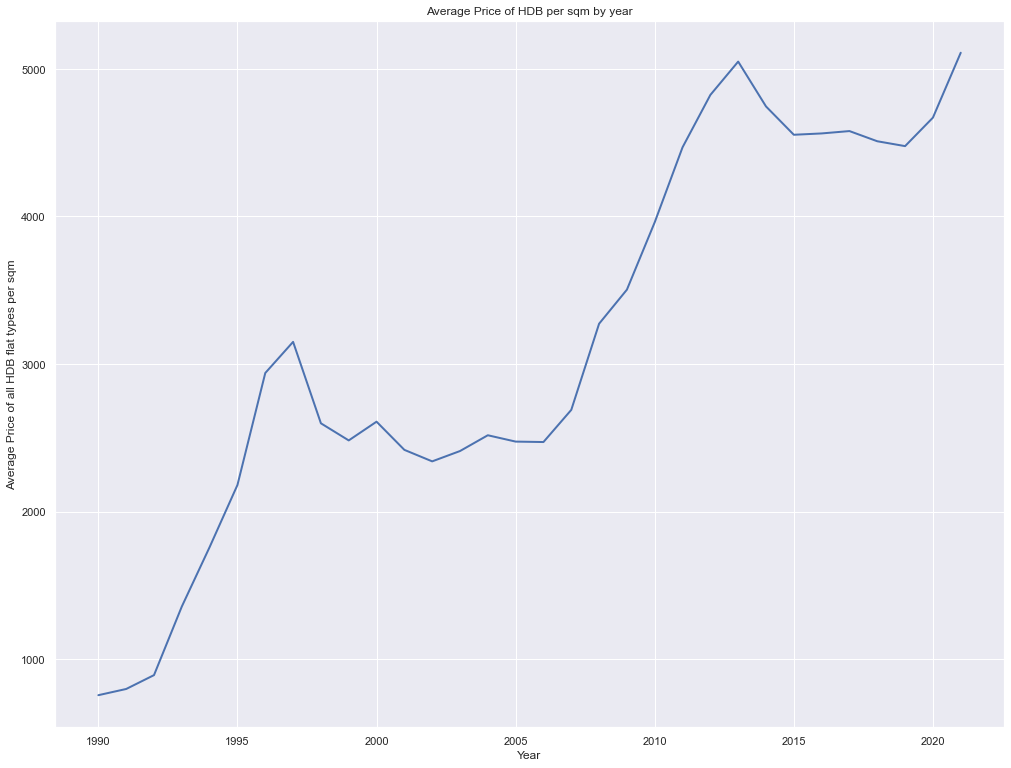

In [19]:
#plot average HDB price by year

fig = plt.gcf();
fig.set_size_inches(17,13);
plt.plot(df_mean['year'],df_mean['price_per_sqm'],linewidth=2);
plt.xlabel('Year');
plt.ylabel('Average Price of all HDB flat types per sqm');
plt.title('Average Price of HDB per sqm by year');



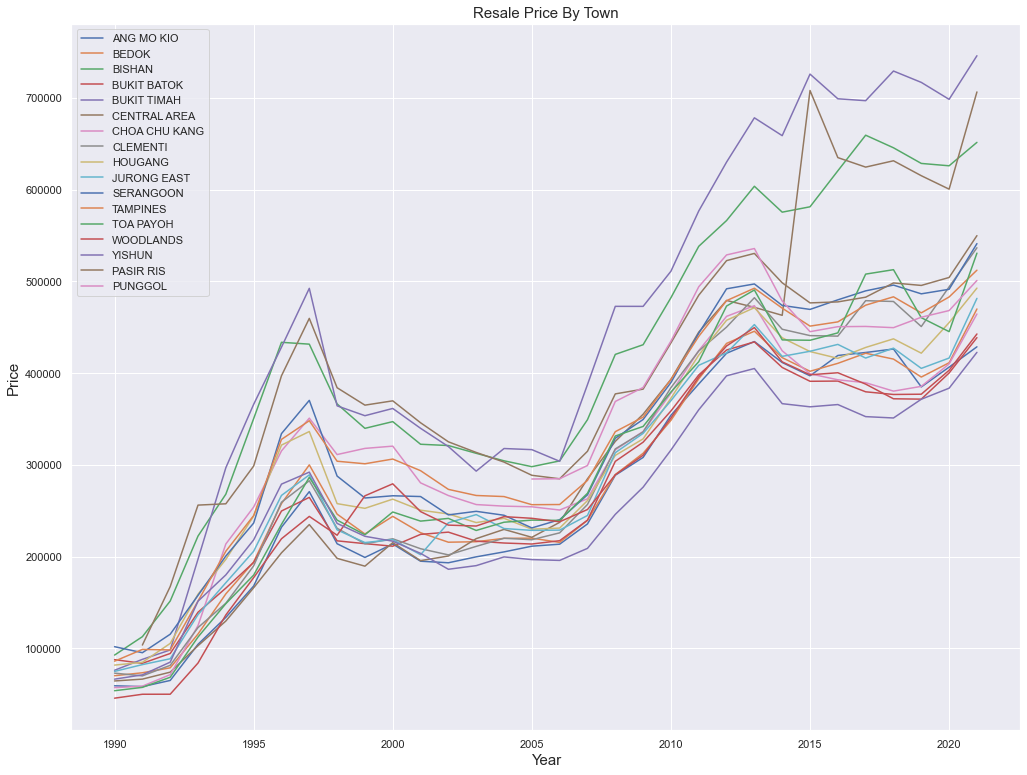

In [90]:
fig = plt.gcf()
fig.set_size_inches(17,13)

town_list = [df_ANG_MO_KIO,df_BEDOK,df_BISHAN,df_BUKIT_BATOK,df_BUKIT_TIMAH,df_CENTRAL_AREA,df_CHOA_CHU_KANG,\
             df_CLEMENTI,df_HOUGANG,df_JURONG_EAST,\
            df_SERANGOON,df_TAMPINES,df_TOA_PAYOH,df_WOODLANDS,\
            df_YISHUN,df_PASIR_RIS,df_PUNGGOL]

town_legend1 = ['ANG MO KIO', 'BEDOK','BISHAN','BUKIT BATOK', 'BUKIT TIMAH','CENTRAL AREA', 'CHOA CHU KANG','CLEMENTI','HOUGANG',\
               'JURONG EAST','SERANGOON','TAMPINES','TOA PAYOH','WOODLANDS','YISHUN',\
                'PASIR RIS','PUNGGOL']

for d in town_list:
    plt.plot(d['year'], d['resale_price']);
plt.legend(town_legend1);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Price', fontsize=15);
plt.title('Resale Price By Town', fontsize=15);

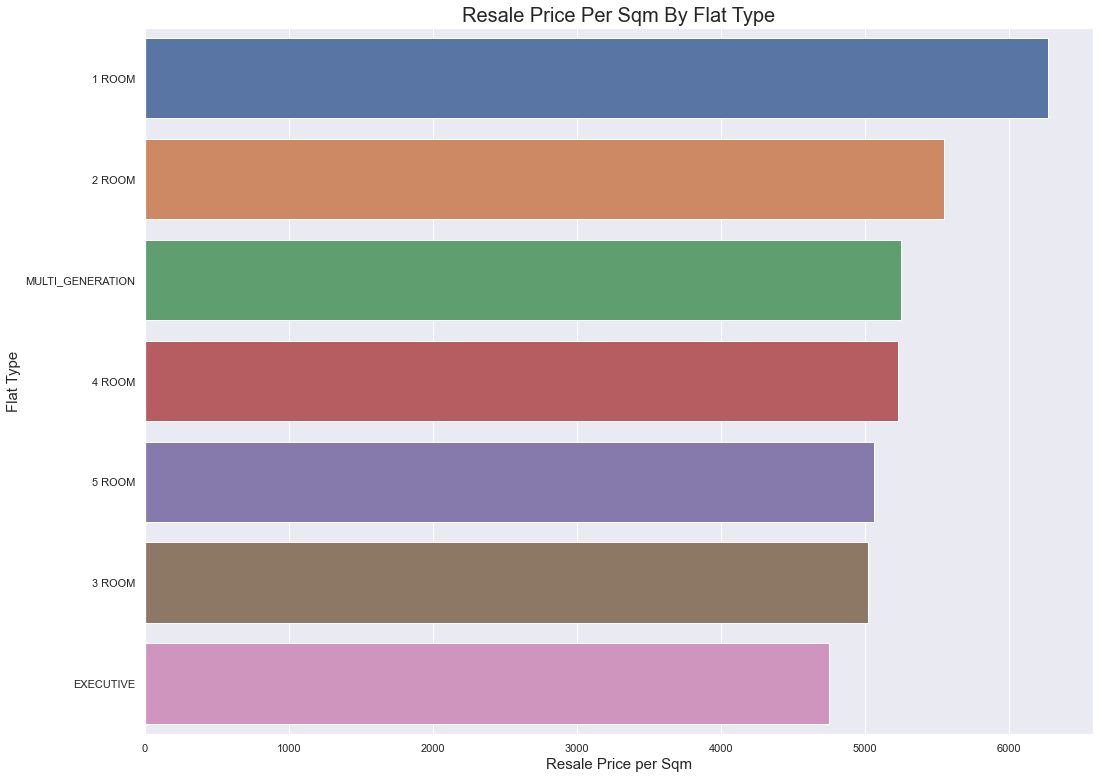

In [88]:
#plot chart to visualize resale price comparison based on flat type

fig = plt.gcf()
fig.set_size_inches(17,13)
df6=df5[df5['year']>2020]
df_px_type_2020_now = round(df6.groupby('flat_type')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_px_type_2020_now.reset_index(inplace=True)
df_px_type_2020_now.sort_values('price_per_sqm', ascending=False, inplace=True)

sns.barplot(x='price_per_sqm',y='flat_type', data=df_px_type_2020_now);
plt.title('Resale Price Per Sqm By Flat Type', fontsize=20);
plt.xlabel('Resale Price per Sqm', fontsize=15);
plt.ylabel('Flat Type',fontsize=15);

In [92]:
#create dataframe for resale price based on town (> year 2020)

df6=df5[df5['year']>2020]
df_px_town_2020_now = round(df6.groupby('town')['resale_price'].agg(np.mean).to_frame(),0)
df_px_town_2020_now.reset_index(inplace=True)
df_px_town_2020_now.sort_values('resale_price', ascending=False, inplace=True)

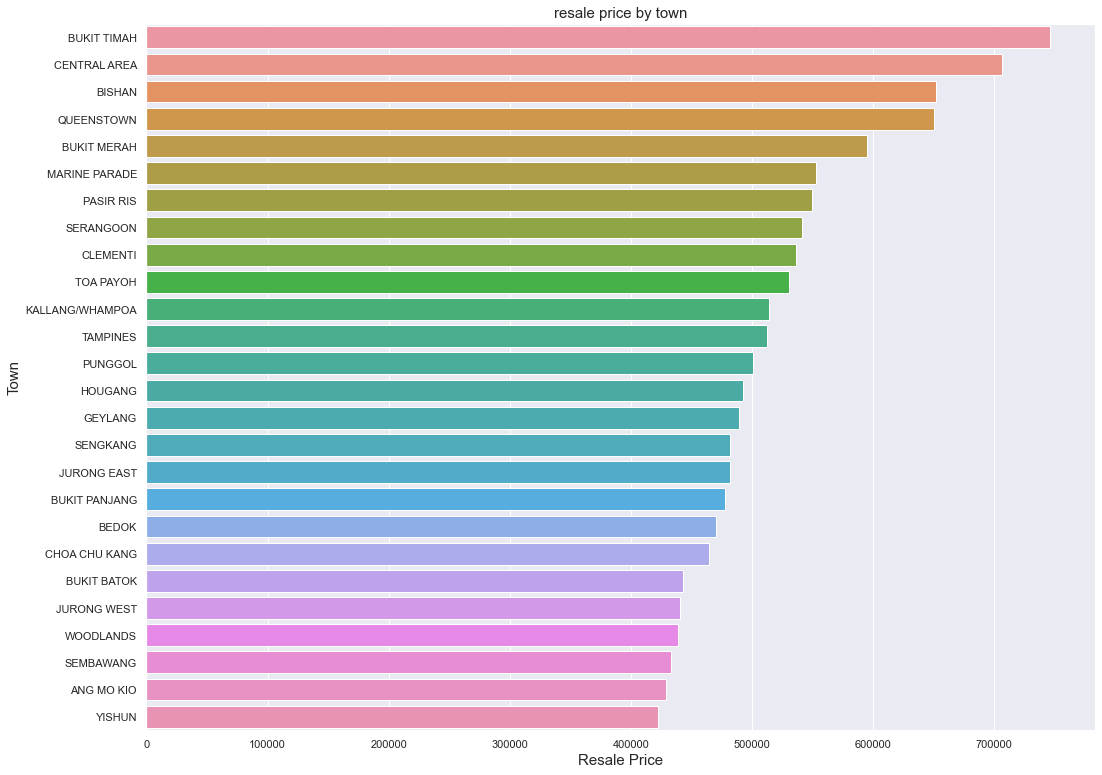

In [93]:
#plot chart to visualize resale price comparison based on flat type

fig = plt.gcf()
fig.set_size_inches(17,13)
sns.barplot(x='resale_price', y='town', data=df_px_town_2020_now);
plt.title('resale price by town', fontsize=15);
plt.xlabel('Resale Price', fontsize=15);
plt.ylabel('Town', fontsize=15);

In [96]:
# create a dataframe of price based on remaining leases
rng_lease=round(df5.groupby('remaining_lease')['price_per_sqm'].agg(np.mean),0).to_frame()
rng_lease.reset_index(inplace=True)


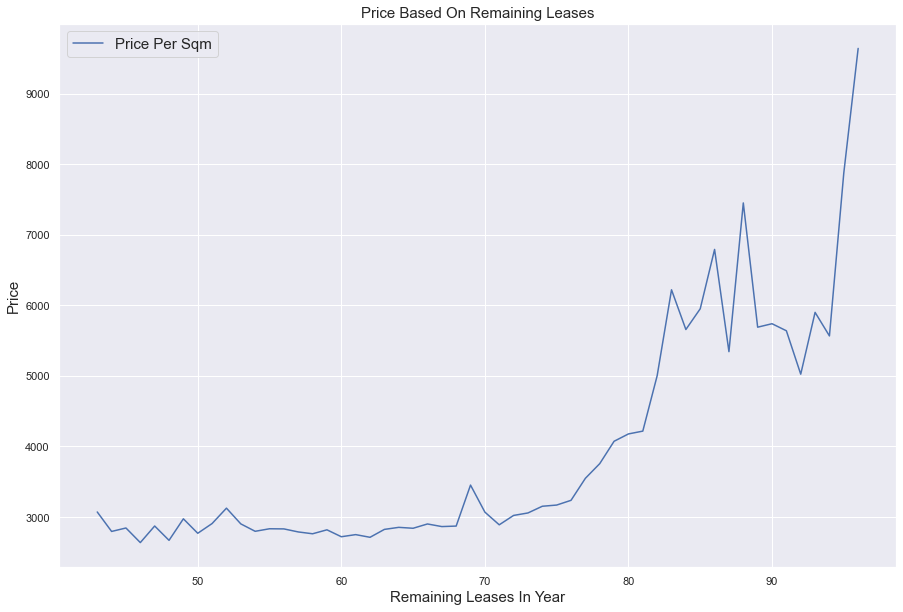

In [99]:
# plot a line of price per sqm based on remaining years

fig =plt.gcf()
fig.set_size_inches(15,10)
plt.plot(rng_lease['remaining_lease'],rng_lease['price_per_sqm']);
plt.xlabel('Remaining Leases In Year', fontsize=15);
plt.ylabel('Price', fontsize=15);
plt.legend(['Price Per Sqm'], fontsize=15);
plt.title('Price Based On Remaining Leases', fontsize=15);

In [102]:
# examing price per remaining year for AMK

df_ANG_MO_KIO_1 = df5.loc[df5['town']=='ANG MO KIO']
df_ANG_MO_KIO_1 = round(df_ANG_MO_KIO_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_ANG_MO_KIO_1.reset_index(inplace=True)

df_WOODLANDS_1= df5.loc[df5['town']=='WOODLANDS']
df_WOODLANDS_1= round(df_WOODLANDS_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_WOODLANDS_1.reset_index(inplace=True)

df_MARINE_PARADE_1= df5.loc[df5['town']=='MARINE PARADE']
df_MARINE_PARADE_1= round(df_MARINE_PARADE_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_MARINE_PARADE_1.reset_index(inplace=True)

df_BISHAN_1= df5.loc[df5['town']=='BISHAN']
df_BISHAN_1= round(df_BISHAN_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_BISHAN_1.reset_index(inplace=True)

df_TAMPINES_1= df5.loc[df5['town']=='TAMPINES']
df_TAMPINES_1= round(df_TAMPINES_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_TAMPINES_1.reset_index(inplace=True)

df_JURONG_EAST_1= df5.loc[df5['town']=='JURONG EAST']
df_JURONG_EAST_1= round(df_JURONG_EAST_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_JURONG_EAST_1.reset_index(inplace=True)

df_TOA_PAYOH_1=df5.loc[df5['town']=='TOA PAYOH']
df_TOA_PAYOH_1= round(df_TOA_PAYOH_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_TOA_PAYOH_1.reset_index(inplace=True)

df_YISHUN_1= df5.loc[df5['town']=='YISHUN']
df_YISHUN_1= round(df_YISHUN_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_YISHUN_1.reset_index(inplace=True)

df_CENTRAL_AREA_1= df5.loc[df5['town']=='CENTRAL AREA']
df_CENTRAL_AREA_1= round(df_CENTRAL_AREA_1.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_CENTRAL_AREA_1.reset_index(inplace=True)


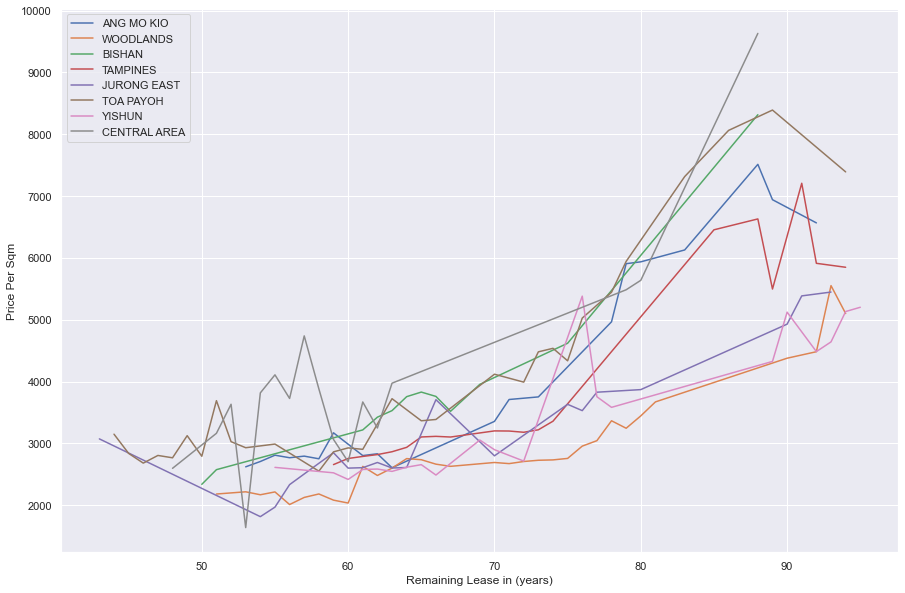

In [103]:
# plot price per sqm per remaining year

fig = plt.gcf()
fig.set_size_inches(15,10)

file_list = [df_ANG_MO_KIO_1,df_WOODLANDS_1,df_BISHAN_1,df_TAMPINES_1,df_JURONG_EAST_1,df_TOA_PAYOH_1,\
             df_YISHUN_1,df_CENTRAL_AREA_1]

for b in file_list:
    plt.plot(b['remaining_lease'],b['price_per_sqm']);
plt.xlabel('Remaining Lease in (years)');
plt.ylabel('Price Per Sqm');
plt.legend(['ANG MO KIO','WOODLANDS','BISHAN','TAMPINES','JURONG EAST','TOA PAYOH','YISHUN', 'CENTRAL AREA'] );


In [104]:
df_flat_type=df5['flat_type'].value_counts().to_frame()
df_flat_type.reset_index(inplace=True)
df_flat_type.rename(columns={'index':'flat_type','flat_type':'no_of_transactions'}, inplace=True)

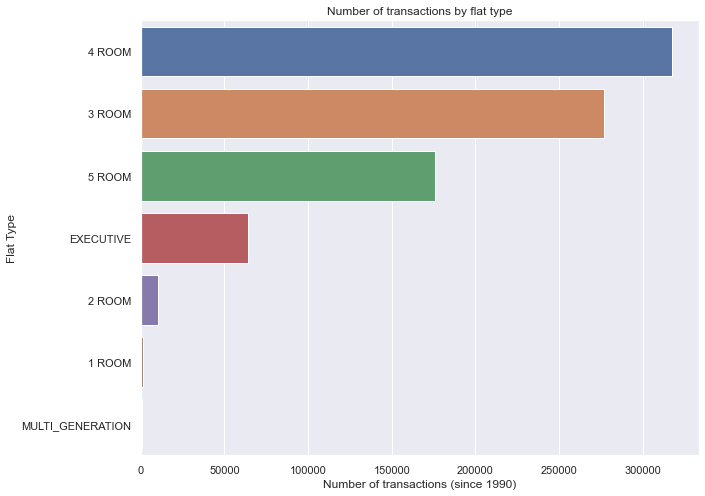

In [105]:
#create chart to show number of transactions since 1990

fig=plt.gcf()
fig.set_size_inches(10,8)

sns.barplot(x='no_of_transactions', y='flat_type', data=df_flat_type);
plt.xlabel('Number of transactions (since 1990)');
plt.ylabel('Flat Type');
plt.title('Number of transactions by flat type');

In [106]:
df5.head()

,year,town,flat_type,floor_area_sqm,resale_price,price_per_sqm,price_sqm_per_remaining_yr,lease_commence_date,remaining_lease
0,1990,ANG MO KIO,1 ROOM,31.0,9000.0,290.0,5.0,1977,54
1,1990,ANG MO KIO,1 ROOM,31.0,6000.0,194.0,4.0,1977,54
2,1990,ANG MO KIO,1 ROOM,31.0,8000.0,258.0,5.0,1977,54
3,1990,ANG MO KIO,1 ROOM,31.0,6000.0,194.0,4.0,1977,54
4,1990,ANG MO KIO,3 ROOM,73.0,47200.0,647.0,12.0,1976,53


In [107]:
df5.corr()

,year,floor_area_sqm,resale_price,price_per_sqm,price_sqm_per_remaining_yr,lease_commence_date,remaining_lease
year,1.000000,0.072927,0.616645,0.754623,0.651400,0.388662,0.388662
floor_area_sqm,0.072927,1.000000,0.615971,0.117575,-0.046652,0.448840,0.448840
resale_price,0.616645,0.615971,1.000000,0.827965,0.652040,0.507846,0.507846
price_per_sqm,0.754623,0.117575,0.827965,1.000000,0.902793,0.351454,0.351454
price_sqm_per_remaining_yr,0.651400,-0.046652,0.652040,0.902793,1.000000,-0.053100,-0.053100
lease_commence_date,0.388662,0.448840,0.507846,0.351454,-0.053100,1.000000,1.000000
remaining_lease,0.388662,0.448840,0.507846,0.351454,-0.053100,1.000000,1.000000


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

0.3799728802674943

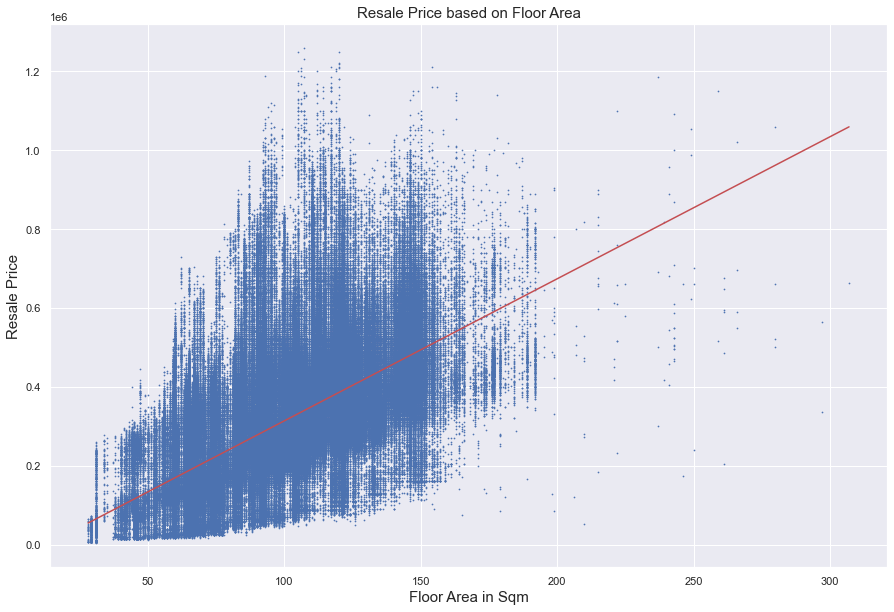

In [103]:
#creating a scatter plot to find out the correlation between floor area and price

fig = plt.gcf()
fig.set_size_inches(15,10)

plt.scatter(df5['floor_area_sqm'],df5['resale_price'],s=.5);
plt.xlabel('Floor Area in Sqm', fontsize=15);
plt.ylabel('Resale Price', fontsize=15);
plt.title('Resale Price based on Floor Area', fontsize=15);

x= df5['floor_area_sqm'].values.reshape(-1,1)
y= df5['resale_price']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
lm = LinearRegression()
lm.fit(x_train,y_train)
b = lm.intercept_
m = lm.coef_
# x1=df5['floor_area_sqm'].min()
# x2=df5['floor_area_sqm'].max()
func1 = lambda x: m*x + b

y1=np.array([func1(28), func1(307)])
x1=np.array([28,307])
plt.plot(x1,y1, c='r');

lm.score(x_test, y_test)

0.2576362023488974

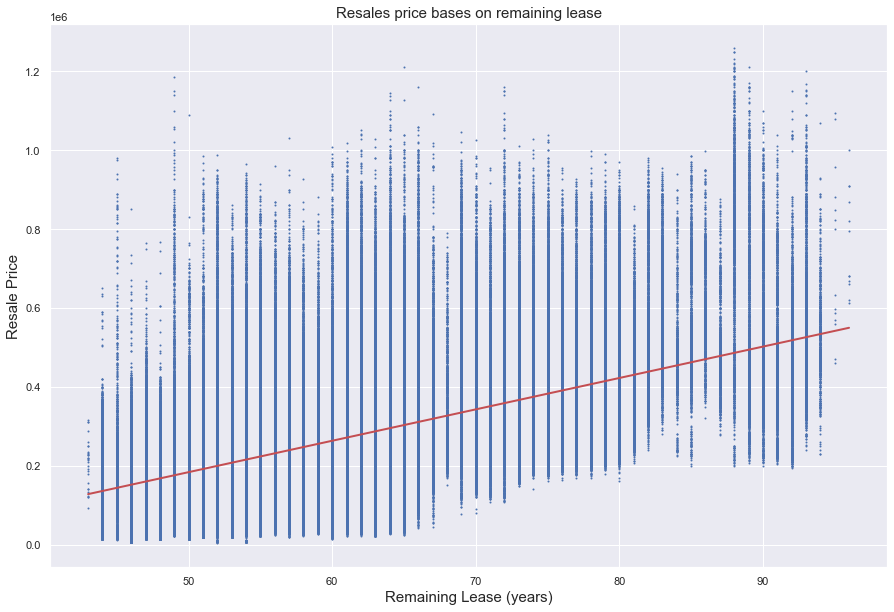

In [104]:
# creating a scatter plot finding out how price response with changes in remaining lease

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.scatter(df5['remaining_lease'],df5['resale_price'], s=1);
plt.xlabel('Remaining Lease (years)', fontsize=15);
plt.ylabel('Resale Price', fontsize=15);
plt.title('Resales price bases on remaining lease', fontsize=15);



# creating a regression line to show the correlation between resale price and remaining leases

x = df5['remaining_lease'].values.reshape(-1,1)
y = df5['resale_price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
lm = LinearRegression()
lm.fit(x_train, y_train)

func=lambda x: lm.coef_*x + lm.intercept_
y=np.array([func(df5['remaining_lease'].min()), func(df5['remaining_lease'].max())])
x=np.array([df5['remaining_lease'].min(),df5['remaining_lease'].max()])

plt.plot(x,y, linewidth=2, c='r');

lm.score(x_test, y_test)

In [111]:
df5.tail()

,year,town,flat_type,floor_area_sqm,resale_price,price_per_sqm,price_sqm_per_remaining_yr,lease_commence_date,remaining_lease
100013,2021,YISHUN,EXECUTIVE,146.0,630000.0,4315.0,66.0,1988,65
100014,2021,YISHUN,EXECUTIVE,142.0,728000.0,5127.0,80.0,1987,64
100015,2021,YISHUN,EXECUTIVE,146.0,715000.0,4897.0,75.0,1988,65
100016,2021,YISHUN,MULTI_GENERATION,179.0,860000.0,4804.0,75.0,1987,64
100017,2021,YISHUN,MULTI_GENERATION,171.0,860000.0,5029.0,79.0,1987,64


In [106]:
# encoding 'town'

le1 = preprocessing.LabelEncoder()

In [107]:
le1.fit(df5['town'])

LabelEncoder()

In [108]:
df5['town_le']=le1.transform(df5['town'])

In [109]:
df5.corr()

,year,floor_area_sqm,resale_price,price_per_sqm,price_sqm_per_remaining_yr,lease_commence_date,remaining_lease,town_le
year,1.000000,0.072927,0.616645,0.754623,0.651400,0.388662,0.388662,0.067468
floor_area_sqm,0.072927,1.000000,0.615971,0.117575,-0.046652,0.448840,0.448840,0.136495
resale_price,0.616645,0.615971,1.000000,0.827965,0.652040,0.507846,0.507846,0.056233
price_per_sqm,0.754623,0.117575,0.827965,1.000000,0.902793,0.351454,0.351454,-0.007735
price_sqm_per_remaining_yr,0.651400,-0.046652,0.652040,0.902793,1.000000,-0.053100,-0.053100,-0.081566
lease_commence_date,0.388662,0.448840,0.507846,0.351454,-0.053100,1.000000,1.000000,0.218027
remaining_lease,0.388662,0.448840,0.507846,0.351454,-0.053100,1.000000,1.000000,0.218027
town_le,0.067468,0.136495,0.056233,-0.007735,-0.081566,0.218027,0.218027,1.000000


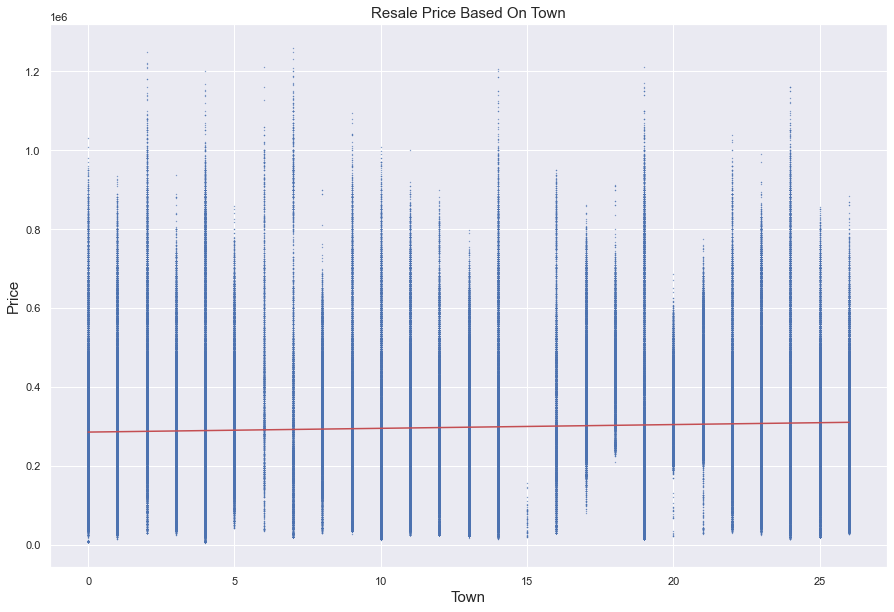

In [110]:
# find out how price responds to location

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.scatter(df5['town_le'],df5['resale_price'],s=.1);
plt.xlabel('Town', fontsize=15);
plt.ylabel('Price', fontsize=15);
plt.title('Resale Price Based On Town', fontsize=15)

x=df5['town_le'].values.reshape(-1,1)
y=df5['resale_price']

# plot a line best represents the relationship between price and town

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
lm = LinearRegression()
lm.fit(x_train, y_train)
m = lm.coef_
b = lm.intercept_
x_min = df5['town_le'].min()
x_max = df5['town_le'].max()

func = lambda x: m*x + b
x1 = np.array([x_min, x_max])
y1 = np.array([func(x_min), func(x_max)])
plt.plot(x1,y1, c='r');

In [22]:
dfp = pd.read_csv('private-residential-property-price-index-base-quarter-2009-q1-100.csv')

In [23]:
dfp.head()

,quarter,level_1,value
0,1975-Q1,Residential Properties,8.9
1,1975-Q2,Residential Properties,9.1
2,1975-Q3,Residential Properties,9.1
3,1975-Q4,Residential Properties,9.1
4,1976-Q1,Residential Properties,9.5


In [24]:
dfp.shape

(181, 3)

In [26]:
dfp['year']=[i[:-3] for i in dfp['quarter']]

In [27]:
dfp.head()

,quarter,level_1,value,year
0,1975-Q1,Residential Properties,8.9,1975
1,1975-Q2,Residential Properties,9.1,1975
2,1975-Q3,Residential Properties,9.1,1975
3,1975-Q4,Residential Properties,9.1,1975
4,1976-Q1,Residential Properties,9.5,1976


In [28]:
dfp[['year','quarter','level_1','value']]

,year,quarter,level_1,value
0,1975,1975-Q1,Residential Properties,8.9
1,1975,1975-Q2,Residential Properties,9.1
2,1975,1975-Q3,Residential Properties,9.1
3,1975,1975-Q4,Residential Properties,9.1
4,1976,1976-Q1,Residential Properties,9.5
...,...,...,...,...
176,2019,2019-Q1,Residential Properties,148.6
177,2019,2019-Q2,Residential Properties,150.8
178,2019,2019-Q3,Residential Properties,152.8
179,2019,2019-Q4,Residential Properties,153.6


In [31]:
dfp_yr=dfp.groupby('year')['value'].agg(np.mean).to_frame()

In [34]:
dfp_yr.reset_index(inplace=True)

In [57]:
dfp_yr['year']=[int(j) for j in dfp_yr['year']]

In [60]:
dfp_yr=dfp_yr[dfp_yr['year']>1989]

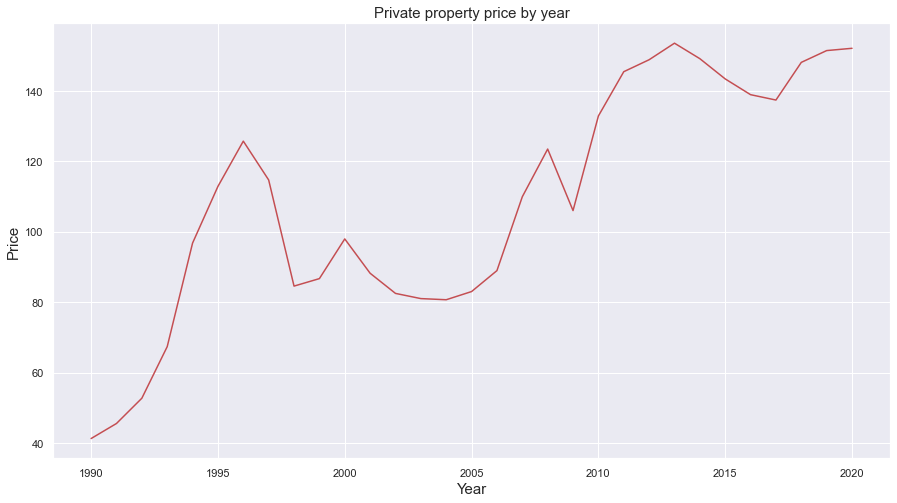

In [111]:
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.plot(dfp_yr['year'],dfp_yr['value'], c='r');
plt.xlabel('Year', fontsize=15);
plt.ylabel('Price', fontsize=15);
plt.title('Private property price by year', fontsize=15);

Text(0.5, 1.0, 'HDB price by year')

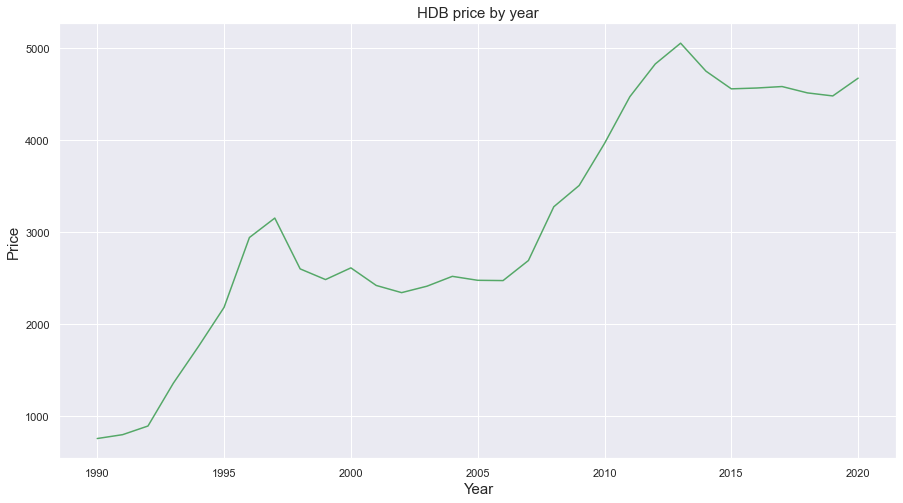

In [113]:
fig=plt.gcf()
fig.set_size_inches(15,8)
df_mean_1=df_mean[df_mean['year']<2021]
plt.plot(df_mean_1['year'],df_mean_1['price_per_sqm'],c = 'g');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Price',fontsize=15);
plt.title('HDB price by year',fontsize=15)

In [79]:
dfp_t=pd.read_csv('private-residential-property-price-index-by-type-of-property-base-quarter-2009-q1-100.csv')

In [81]:
dfp_t['level_2'].value_counts()

Landed        181
Non-landed    181
Name: level_2, dtype: int64